# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Data

In [2]:
df = pd.read_csv('raw/c430bf0a-e6bd-42e1-ad60-0278754dbd5b.csv')

In [3]:
df.columns

Index(['_id', 'id', 'ogc_fid', 'uid_filaire', 'x', 'y', 'boucle',
       'emplacement', 'orientation', 'type', 'fiabilite', 'orien_etiq',
       'commentaire', 'tmja_2022_mois1', 'tmja_2022_mois2', 'tmja_2022_mois3',
       'tmja_2022_mois4', 'tmja_2022_mois5', 'tmja_2022_mois6',
       'tmja_2022_mois7', 'tmja_2022_mois8', 'tmja_2022_mois9',
       'tmja_2022_mois10', 'tmja_2022_mois11', 'tmja_2022_mois12',
       'tmja_2022_moistmja_2022', 'fid', 'geo_point_2d'],
      dtype='object')

In [4]:
df.boucle.unique()
# "Boucle" means "Loop" --> probably Inductive loops

array([ 521,  501, 1451, 1551,   31,  902,  491,  901,  906,  903,  511,
       1541,  411,  533,  532,  531,  462, 1581,   32,   52,   61,   63,
         44, 1452,  821,   43,   42,   41,   13,   12,   11,  181,   51,
       2031,  581, 1532, 1501, 1582, 1232,  414, 1281, 1282, 1531,   23,
        461, 1562, 1561,   22, 2032, 1564, 1563, 1283, 1742, 1022, 1031,
        192,  194,  822,  184,  121,  122,  123, 1032,  153,  152,  282,
        191,  193,  162,  163,  182,  183,  131,  151,  202,  201,  321,
        161,  351,  352, 1184, 1182, 1185,  332,  323,  324,  111,  322,
        823,  281,  283,  331, 1183, 1191,  824,   71,   62, 1197, 1194,
        112,  101,  383, 1193, 1181, 1192, 1198,   91, 1196,   93, 1195,
         94, 1202, 1201,  113,   92,  622,  413, 1252,  384, 1251,  702,
       1261,  621,  691,  402,  661,  401,  412, 1331,  631,  421,  422,
       1231,  382, 1263, 1253, 1741,  992, 1002, 1801, 1812,  991, 1813,
       1792, 1752, 1751, 1791, 1793, 1731, 1001, 18

In [6]:
# This can give us an indication on the number of lanes monitored
df.type.unique()

array(['double droit large', 'simple droit', 'double droit etroit',
       'tourne a droite double', 'tourne a gauche double',
       'tourne a gauche simple', 'triple droit', 'tourne a gauche',
       'droit large', 'tourne a droite'], dtype=object)

In [17]:
d = {
    'double droit large':2, 'simple droit':1, 'double droit etroit':2,
       'tourne a droite double':2, 'tourne a gauche double':2,
       'tourne a gauche simple':1, 'triple droit':3, 'tourne a gauche':1,
       'droit large':1, 'tourne a droite':1
}

df['raw_lanes'] = df['type'].apply(lambda x : d[x])

In [7]:
# Understanding columns
abs(df[['tmja_2022_mois1', 'tmja_2022_mois2', 'tmja_2022_mois3',
       'tmja_2022_mois4', 'tmja_2022_mois5', 'tmja_2022_mois6',
       'tmja_2022_mois7', 'tmja_2022_mois8', 'tmja_2022_mois9',
       'tmja_2022_mois10', 'tmja_2022_mois11', 'tmja_2022_mois12']].mean(axis = 1) - df['tmja_2022_moistmja_2022']).sum()

5.517719614545058e-11

In [9]:
df.fiabilite.value_counts()

fiabilite
Inconnue                                          71
Inutilisable pour les comptages                   44
Bonne fiabilite. Utilisable pour les comptages    42
Name: count, dtype: int64

In [12]:
df[df.columns[:15]].head()

,_id,id,ogc_fid,uid_filaire,x,y,boucle,emplacement,orientation,type,fiabilite,orien_etiq,commentaire,tmja_2022_mois1,tmja_2022_mois2
0,1,521,25,39793362-8412-40d5-bcbd-8ef69be36fd6,1913110,4221889,521,Cours de la libération,10,double droit large,Bonne fiabilite. Utilisable pour les comptages,76.0,Validation par comparaison avec comptage ponctuel,4663.879032,5061.901786
1,2,501,30,9f8ec2e9-a38f-4fbd-b862-6b9c46dbf4c2,1913232,4222478,501,Cours de la libération,12,simple droit,Bonne fiabilite. Utilisable pour les comptages,260.0,Validation par comparaison avec comptage ponctuel,5185.443548,5596.437500
2,3,1451,50,7b5d0e3b-282b-4b58-bf29-68c72d9571ef,1915488,4222214,1451,Avenue Jean Jaures,340,double droit large,Inutilisable pour les comptages,292.0,Inapte au comptage,1.435484,1.196429
3,4,1551,42,c675a1bf-f540-42ee-9092-278b2480d2df,1914756,4221329,1551,Avenue de l'Europe,266,double droit large,Inutilisable pour les comptages,NaN,Différence avec ponctuel (-45%) / Observation ...,14442.008065,14229.285714
4,5,31,18,13b0ca5e-9d46-4cd2-b037-fc96f34c9422,1913131,4223582,31,Boulevard Joseph Vallier,86,double droit etroit,Bonne fiabilite. Utilisable pour les comptages,NaN,Validation par comparaison avec comptage ponctuel,9852.943548,10278.169643


In [13]:
# Remove counts that are inapropriate 
df = df[df.fiabilite != 'Inutilisable pour les comptages']

In [31]:
# convert in GeoDataFrame
gdf = gpd.GeoDataFrame(df[['tmja_2022_moistmja_2022', 'emplacement', 'orientation', 'raw_lanes']], 
                 #geometry = gpd.points_from_xy(df.x, df.y), 
                 geometry = gpd.points_from_xy(
                     x = df.geo_point_2d.apply(lambda u : float(u.split(',')[1])),
                     y = df.geo_point_2d.apply(lambda u : float(u.split(',')[0]))
                 ),
                 crs = 'epsg:4326' #2154 #
                 ) #.to_crs('epsg:4326') #.explore()

In [32]:
gdf.columns = ['AADT', 'raw_name', 'raw_direction', 'raw_lanes', 'geometry']

In [34]:
gdf.dropna(subset = ['AADT', 'geometry'], inplace=True)

In [35]:
gdf = gdf[gdf.AADT != 0]

In [36]:
gdf.shape

(113, 5)

(5.690875053405761, 5.756811918462995, 45.15105454897754, 45.21303378869372)

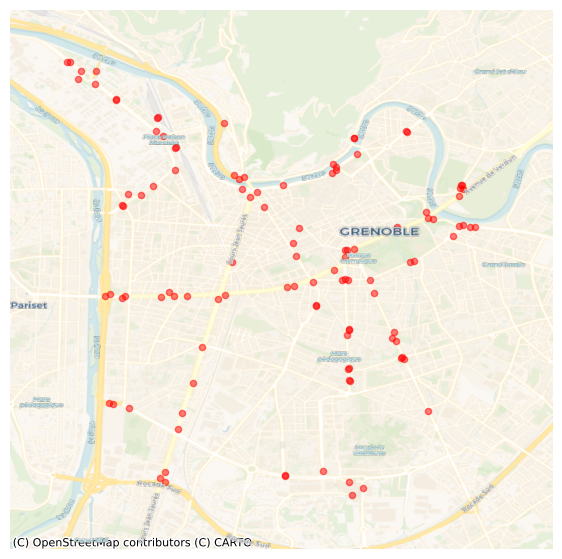

In [37]:
import contextily as cx
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 20, alpha = .5, figsize = (7,7))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

In [28]:
# This should be done with gdf prior to join

import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import points_matching

In [38]:
gdf = points_matching(gdf)

City downloaded


100%|██████████| 113/113 [00:00<00:00, 214.06it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
We failed to match 4 sensors
...on a total of 113 sensors


In [39]:
gdf[['raw_name', 'osm_name']].dropna().drop_duplicates()[:25]

,raw_name,osm_name
0,Cours de la libération,Cours de la Libération et du Général de Gaulle
4,Boulevard Joseph Vallier,Boulevard Joseph Vallier
9,Rue Albert Reynier,Rue Albert Reynier
13,Rue Pierre de Coubertin,Carrefour du Rondeau
16,Jaurès bis,Cours Jean Jaurès
17,Avenue de l'Europe,Avenue de l'Europe
19,Foch,Boulevard Maréchal Foch
20,Joffre,Boulevard Maréchal Foch
21,Rue Nestor Cornier,Rue Nestor Cornier
22,Boulevard Marechal Foch,Boulevard Maréchal Foch


In [42]:
gdf['raw_oneway'] = True
gdf = gdf[['AADT', 'raw_name', 'raw_oneway', 'raw_direction', 'raw_lanes', 'geometry',
       'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osm_distance',
       'osmid']]

In [43]:
gdf

,AADT,raw_name,raw_oneway,raw_direction,raw_lanes,geometry,osm_name,osm_type,osm_lanes,osm_oneway,osm_distance,osmid
0,4830.186969,Cours de la libération,True,10,2,POINT (5.71134 45.16488),Cours de la Libération et du Général de Gaulle,primary,2.0,True,3.255664,4.014454e+06
1,5434.239560,Cours de la libération,True,12,1,POINT (5.71315 45.17015),Cours de la Libération et du Général de Gaulle,residential,1.0,True,0.078202,4.632547e+08
4,11306.851000,Boulevard Joseph Vallier,True,86,2,POINT (5.71234 45.18011),Boulevard Joseph Vallier,primary,2.0,True,1.175468,5.990508e+06
5,5126.270275,A480,True,91,2,POINT (5.70342 45.16768),NaN,motorway_link,1.0,True,0.022364,4.014316e+06
6,13861.116247,Cours de la libération,True,192,2,POINT (5.71425 45.17426),Cours de la Libération et du Général de Gaulle,primary,1.0,True,3.904600,2.281601e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3063.501867,Rue Felix Esclanglon,True,-247,2,POINT (5.71102 45.19731),NaN,NaN,NaN,NaN,NaN,NaN
153,6975.359734,Rue Felix Esclanglon,True,-68,2,POINT (5.71093 45.19713),NaN,NaN,NaN,NaN,NaN,NaN
154,5922.657379,Rue Felix Esclanglon,True,220,2,POINT (5.70828 45.19282),Rue Félix Esclangon,tertiary,2.0,True,1.319864,3.961142e+07
155,5847.402349,Rue Felix Esclanglon,True,-320,2,POINT (5.70676 45.19174),Rue Félix Esclangon,tertiary,4.0,NaN,3.044330,3.001235e+08


# Final save

In [44]:
gdf.to_file('treated/Grenoble_AADT_2022.geojson')